## 1st Dataset - MMM

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
mmm_train = pd.read_excel("MMM.xlsx", sheet_name=0,)
mmm_test = pd.read_excel("MMM.xlsx", sheet_name=1)

In [3]:
mmm_train.shape, mmm_test.shape

((3238, 9), (953, 9))

In [4]:
mmm_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3238 entries, 0 to 3237
Data columns (total 9 columns):
Sales                   3238 non-null int64
Price                   3238 non-null float64
Feature                 3238 non-null int64
Display                 3238 non-null int64
Price - Competitor 1    3238 non-null float64
Price - Competitor 2    3238 non-null float64
Price - Competitor 3    3238 non-null float64
Price - Competitor 4    3238 non-null float64
Price - Competitor 5    3238 non-null float64
dtypes: float64(6), int64(3)
memory usage: 227.8 KB


In [5]:
mmm_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 9 columns):
Sales                   953 non-null int64
Price                   953 non-null float64
Feature                 953 non-null int64
Display                 953 non-null int64
Price - Competitor 1    953 non-null float64
Price - Competitor 2    953 non-null float64
Price - Competitor 3    953 non-null float64
Price - Competitor 4    953 non-null float64
Price - Competitor 5    953 non-null float64
dtypes: float64(6), int64(3)
memory usage: 67.1 KB


In [6]:
mmm_train.head(3)

,Sales,Price,Feature,Display,Price - Competitor 1,Price - Competitor 2,Price - Competitor 3,Price - Competitor 4,Price - Competitor 5
0,20,5.690,0,0,4.065,4.108,5.280,4.690,3.29
1,26,5.968,0,0,4.065,3.775,5.247,3.946,3.49
2,41,6.190,0,0,4.064,3.421,5.540,3.330,3.69


In [7]:
mmm_test.head(3)

,Sales,Price,Feature,Display,Price - Competitor 1,Price - Competitor 2,Price - Competitor 3,Price - Competitor 4,Price - Competitor 5
0,97,5.968,0,1,4.928,3.219,6.29,4.853,3.49
1,621,3.990,1,1,4.928,3.926,5.99,5.204,3.49
2,96,5.990,0,0,4.928,3.143,6.25,4.840,3.49


In [8]:
mmm_train.isnull().sum()

Sales                   0
Price                   0
Feature                 0
Display                 0
Price - Competitor 1    0
Price - Competitor 2    0
Price - Competitor 3    0
Price - Competitor 4    0
Price - Competitor 5    0
dtype: int64

In [9]:
mmm_test.isnull().sum()

Sales                   0
Price                   0
Feature                 0
Display                 0
Price - Competitor 1    0
Price - Competitor 2    0
Price - Competitor 3    0
Price - Competitor 4    0
Price - Competitor 5    0
dtype: int64

In [10]:
mmm_train.describe()

,Sales,Price,Feature,Display,Price - Competitor 1,Price - Competitor 2,Price - Competitor 3,Price - Competitor 4,Price - Competitor 5
count,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000,3238.000000
mean,79.677888,5.681580,0.169240,0.131254,4.066095,3.705841,5.619677,4.470330,2.965036
std,91.150090,0.569159,0.375022,0.337730,0.521656,0.466649,0.642104,0.670754,0.593215
min,2.000000,2.500000,0.000000,0.000000,2.030000,1.667000,2.500000,1.110000,0.820000
25%,33.000000,5.480000,0.000000,0.000000,3.626000,3.410250,5.061750,4.000000,2.500000
50%,54.000000,5.790000,0.000000,0.000000,3.975000,3.673000,5.832000,4.512500,3.090000
75%,88.000000,6.072500,0.000000,0.000000,4.598000,3.978750,5.990000,4.999000,3.490000
max,1145.000000,6.490000,1.000000,1.000000,4.928000,4.920000,7.490000,6.290000,3.950000


In [11]:
mmm_test.describe()

,Sales,Price,Feature,Display,Price - Competitor 1,Price - Competitor 2,Price - Competitor 3,Price - Competitor 4,Price - Competitor 5
count,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,76.171039,5.78103,0.293809,0.157398,4.052327,3.953363,5.820519,4.838091,3.170243
std,75.516048,0.68876,0.455745,0.364367,1.145879,0.603132,0.823443,0.804124,0.709980
min,2.000000,2.49600,0.000000,0.000000,1.110000,1.773000,2.500000,1.472000,1.662000
25%,30.000000,5.33200,0.000000,0.000000,2.978000,3.597000,5.248000,4.410000,2.500000
50%,49.000000,5.99000,0.000000,0.000000,4.950000,3.970000,5.990000,4.993000,3.445000
75%,96.000000,6.29000,1.000000,0.000000,5.093000,4.490000,6.390000,5.476000,3.790000
max,648.000000,6.49000,1.000000,1.000000,5.403000,5.070000,7.490000,6.290000,3.950000


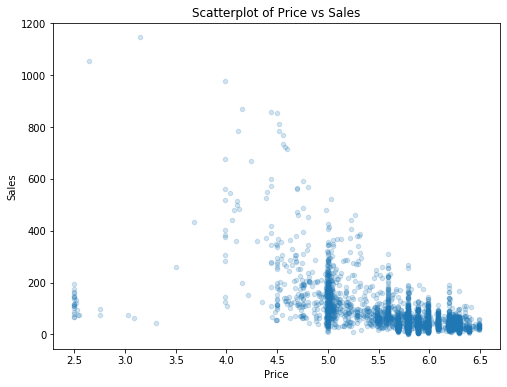

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(mmm_train['Price'],mmm_train['Sales'],alpha=0.2,s=20)
plt.ylabel('Sales')
plt.xlabel('Price')
plt.title('Scatterplot of Price vs Sales')
plt.show()

In [13]:
mmm_train.columns

Index(['Sales', 'Price', 'Feature', 'Display', 'Price - Competitor 1',
       'Price - Competitor 2', 'Price - Competitor 3', 'Price - Competitor 4',
       'Price - Competitor 5'],
      dtype='object')

In [14]:
X_train = mmm_train.iloc[:,1:]
y_train = mmm_train.iloc[:,0]

X_test = mmm_test.iloc[:,1:]
y_test = mmm_test.iloc[:,0]

In [15]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
print('Intercept:',reg.intercept_)
print('Coefficients:\n',reg.coef_)

Intercept: 254.4097781439533
Coefficients:
 [-49.43335982  63.74728008  95.54010777   9.3929225    2.58605144
   3.39611903   5.98477973  -3.64783552]


In [17]:
coeff_df = pd.DataFrame(reg.coef_, X_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Price,-49.433360
Feature,63.747280
Display,95.540108
Price - Competitor 1,9.392922
Price - Competitor 2,2.586051
Price - Competitor 3,3.396119
Price - Competitor 4,5.984780
Price - Competitor 5,-3.647836


In [18]:
y_pred = reg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Explained variance:',metrics.explained_variance_score(y_test, y_pred))
print('R squared:',metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 32.83626421286315
Mean Squared Error: 2389.4683504801023
Root Mean Squared Error: 48.882188478832475
Explained variance: 0.6044771815490719
R squared: 0.5805514170079046


In [19]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
0,97,147.219195
1,621,311.655821
2,96,50.181366
3,380,287.356168
4,85,52.760162


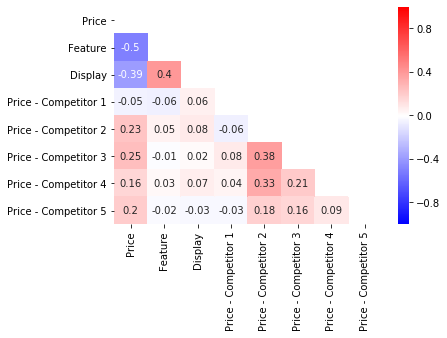

In [20]:
corr = X_train.corr().round(2)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,mask=mask,cmap='bwr',vmin=-1,vmax=1, center=0,annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [21]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train)
results = model.fit()
print(results.summary())

C:\Users\sbane\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     465.5
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        03:45:03   Log-Likelihood:                -17964.
No. Observations:                3238   AIC:                         3.595e+04
Df Residuals:                    3229   BIC:                         3.600e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  254.4098 

C:\Users\sbane\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [22]:
mmm_train.columns

Index(['Sales', 'Price', 'Feature', 'Display', 'Price - Competitor 1',
       'Price - Competitor 2', 'Price - Competitor 3', 'Price - Competitor 4',
       'Price - Competitor 5'],
      dtype='object')

In [23]:
cols = ['Price', 'Feature', 'Display', 'Price - Competitor 1', 'Price - Competitor 4']

X = mmm_train[cols]
y = mmm_train.iloc[:,0]

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     742.0
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        03:45:07   Log-Likelihood:                -17968.
No. Observations:                3238   AIC:                         3.595e+04
Df Residuals:                    3232   BIC:                         3.598e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  261.8958 

In [24]:
# Adding Interaction terms i.e. interactions between features

mmm_train['price_feature'] = mmm_train['Price'] * mmm_train['Feature']
mmm_train['price_display'] = mmm_train['Price'] * mmm_train['Display']
mmm_train['feature_display'] = mmm_train['Feature'] * mmm_train['Display']
mmm_train.head(3)

,Sales,Price,Feature,Display,Price - Competitor 1,Price - Competitor 2,Price - Competitor 3,Price - Competitor 4,Price - Competitor 5,price_feature,price_display,feature_display
0,20,5.690,0,0,4.065,4.108,5.280,4.690,3.29,0.0,0.0,0
1,26,5.968,0,0,4.065,3.775,5.247,3.946,3.49,0.0,0.0,0
2,41,6.190,0,0,4.064,3.421,5.540,3.330,3.69,0.0,0.0,0


In [25]:
X = mmm_train.iloc[:,1:]
y = mmm_train.iloc[:,0]

import statsmodels.api as sm

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     509.3
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        03:45:12   Log-Likelihood:                -17576.
No. Observations:                3238   AIC:                         3.518e+04
Df Residuals:                    3226   BIC:                         3.525e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  121.8312 

In [26]:
mmm_train.columns

Index(['Sales', 'Price', 'Feature', 'Display', 'Price - Competitor 1',
       'Price - Competitor 2', 'Price - Competitor 3', 'Price - Competitor 4',
       'Price - Competitor 5', 'price_feature', 'price_display',
       'feature_display'],
      dtype='object')

In [27]:
cols = ['Price', 'Feature', 'Display', 'Price - Competitor 1', 'Price - Competitor 4', 'price_feature', 'price_display', 'feature_display']
X = mmm_train[cols]
y = mmm_train.iloc[:,0]

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     698.3
Date:                Tue, 21 Jan 2020   Prob (F-statistic):               0.00
Time:                        03:45:25   Log-Likelihood:                -17580.
No. Observations:                3238   AIC:                         3.518e+04
Df Residuals:                    3229   BIC:                         3.523e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  129.3764 

In [28]:
mmm_train.columns

Index(['Sales', 'Price', 'Feature', 'Display', 'Price - Competitor 1',
       'Price - Competitor 2', 'Price - Competitor 3', 'Price - Competitor 4',
       'Price - Competitor 5', 'price_feature', 'price_display',
       'feature_display'],
      dtype='object')

In [29]:
cols = ['Price', 'Feature', 'Display', 'Price - Competitor 1', 'Price - Competitor 4', 'price_feature', 'price_display', 'feature_display']

X_train = mmm_train[cols]
y_train = mmm_train.iloc[:,0]

mmm_test['price_feature'] = mmm_test['Price'] * mmm_test['Feature']
mmm_test['price_display'] = mmm_test['Price'] * mmm_test['Display']
mmm_test['feature_display'] = mmm_test['Feature'] * mmm_test['Display']

X_test = mmm_test[cols]
y_test = mmm_test.iloc[:,0]

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
print('Intercept:',reg.intercept_)
print('Coefficients:\n',reg.coef_)

Intercept: 129.37641888034534
Coefficients:
 [ -25.57457303  350.61234618  602.39040329    9.5325958     7.37422018
  -58.06740785 -100.67497341   37.20120769]


In [31]:
coeff_df = pd.DataFrame(reg.coef_, X_train.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Price,-25.574573
Feature,350.612346
Display,602.390403
Price - Competitor 1,9.532596
Price - Competitor 4,7.374220
price_feature,-58.067408
price_display,-100.674973
feature_display,37.201208


In [32]:
y_pred = reg.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Explained variance:',metrics.explained_variance_score(y_test, y_pred))
print('R squared:',metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 32.65683249263292
Mean Squared Error: 2241.160864219334
Root Mean Squared Error: 47.34090054296954
Explained variance: 0.6075455288952469
R squared: 0.6065853943764267
